<a href="https://colab.research.google.com/github/munzirkalimahmed/Food_Recommendation_System_Using_Machine_Learning/blob/main/detection_of_glucose_monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-python


  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.6 MB 1.6 MB/s eta 0:00:25
   ---------------------------------------- 0.1/38.6 MB 1.1 MB/s eta 0:00:36
   ---------------------------------------- 0.2/38.6 MB 1.3 MB/s eta 0:00:30
   ---------------------------------------- 0.3/38.6 MB 1.4 MB/s eta 0:00:28
   ---------------------------------------- 0.3/38.6 MB 1.4 MB/s eta 0:00:28
   ---------------------------------------- 0.4/38.6 MB 1.3 MB/s eta 0:00:29
    --------------------------------------- 0.6/38.6 MB 2.0 MB/s eta 0:00:19
    --------------------------------------- 0.8/38.6 MB 2.1 MB/s eta 0:00:18
    -------------------

   ---------------------------------------  37.8/38.6 MB 245.5 kB/s eta 0:00:04
   ---------------------------------------  37.8/38.6 MB 246.1 kB/s eta 0:00:04
   ---------------------------------------  37.8/38.6 MB 246.3 kB/s eta 0:00:04
   ---------------------------------------  37.8/38.6 MB 246.6 kB/s eta 0:00:04
   ---------------------------------------  37.8/38.6 MB 246.9 kB/s eta 0:00:04
   ---------------------------------------  37.9/38.6 MB 246.8 kB/s eta 0:00:04
   ---------------------------------------  37.9/38.6 MB 247.1 kB/s eta 0:00:04
   ---------------------------------------  37.9/38.6 MB 247.1 kB/s eta 0:00:04
   ---------------------------------------  37.9/38.6 MB 248.4 kB/s eta 0:00:03
   ---------------------------------------  37.9/38.6 MB 248.4 kB/s eta 0:00:03
   ---------------------------------------  37.9/38.6 MB 248.1 kB/s eta 0:00:03
   ---------------------------------------  37.9/38.6 MB 249.2 kB/s eta 0:00:03
   -------------------------------------

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = r"C:\Users\munzir\Desktop\iris\Iris Eye Images Dataset\"



CATEGORIES = ["Diabetic Patients", "Non Diabetic Patients"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')
        plt.show()

        break  # we just want one for now so break
    break

SyntaxError: unterminated string literal (detected at line 7) (2721172708.py, line 7)

In [ ]:
from PIL import Image, ImageEnhance
import pywt
import pywt.data
import skimage.measure
from skimage import exposure
from skimage.feature import greycomatrix, greycoprops

training_data = []
IMG_SIZE = 200

def create_training_data():
    for category in CATEGORIES:  # do diabetic and Non-diabetic

        # create path to diabetic or Non diabetic
        path = os.path.join(DATADIR,category)

        # get the classification  (0 or a 1). diabetic= 0, Non-diabetic=1
        class_num = CATEGORIES.index(category)

        # iterate over each image per diabetic or Non diabetic
        for img in tqdm(os.listdir(path)):
            # convert to array
            img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)

            # resize to normalize data size
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

            # Contrast Image Enhancement
            im = Image.fromarray(np.uint8(new_array))
            con = ImageEnhance.Contrast(im)
            contrast_image = con.enhance(1.5)

            # Apply feature extractions to grey Scale Images
            # Decomposition

            coeffs2 = pywt.dwt2(contrast_image, 'bior1.3')
            LL, (LH, HL, HH) = coeffs2
            mix_feat = LL + HL

            # Mean
            mean = np.mean(mix_feat)

            # Standard deviation
            std = np.std(mix_feat)

            # Entropy
            entropy = skimage.measure.shannon_entropy(mix_feat)

            # Texture Features using GLCM
            # scaled the values of DWT in range(0,1)
            scaled = exposure.rescale_intensity(mix_feat, out_range=(0, 1))

            im = skimage.img_as_ubyte(scaled)
            im1 = im//32
            g = greycomatrix(im1, [2], [0], 256, symmetric=False, normed=True)
            Contrast = greycoprops(g, 'contrast')[0][0]
            energy = greycoprops(g, 'energy')[0][0]
            homogeneity = greycoprops(g, 'homogeneity')[0][0]
            correlation = greycoprops(g, 'correlation')[0][0]

            # add this to our training_data
            training_data.append([mean, std, entropy, Contrast, energy,
                                  homogeneity, correlation, class_num])


create_training_data()

print(training_data)

100%|████████████████████████████████████████████████████████████████████████████████| 806/806 [00:28<00:00, 28.38it/s]

[[249.50347973135334, 127.93458732423728, 13.25156487864434, 0.4675490196078431, 0.2608022255384883, 0.825161561961216, 0.9392646596711529, 0], [228.14215836457132, 132.87982265478533, 13.200105702260347, 0.47500000000000003, 0.2720060892187667, 0.8301000115100462, 0.938100391270052, 0], [247.9246045691561, 114.7835057296855, 13.236841891190146, 0.7209803921568627, 0.25870069129009216, 0.7748628098420486, 0.8779298579871266, 0], [306.88809217007883, 113.65134349171788, 13.09577331511459, 0.44049019607843143, 0.2994105127289977, 0.8304943217105847, 0.9225882899000898, 0], [286.6164395905421, 137.63205091971614, 13.210510906302208, 0.4524509803921568, 0.26780663920361997, 0.8278953566555644, 0.9488730760300773, 0], [299.50474952542294, 138.93260065293194, 13.208915882998715, 0.45862745098039215, 0.2596749587433976, 0.8200698252151539, 0.9484620911415396, 0], [290.12391192690313, 138.5942828744577, 13.087020921870835, 0.5247058823529411, 0.25982630314248495, 0.8129901689818645, 0.93761425

In [ ]:
print(len(training_data))

1346


In [ ]:
training_data[1]

[260.20418829296426,
 144.9462623741925,
 13.038521108384021,
 0.6370588235294118,
 0.24597580079960726,
 0.7984930112438764,
 0.9252850620246933,
 0]

In [ ]:
import pandas as pd

Data = pd.DataFrame(data=list(training_data),
                   columns=['Mean', 'Std', 'Entropy', 'Contrast', 'Energy', 'Homogenity', 'Correlation', 'Classnum'])
Data.to_csv('output.csv')

# Data Visualization

In [ ]:
import pandas as pd
df = pd.read_csv('output.csv')

In [ ]:
df.head(5)

,Unnamed: 0,Mean,Std,Entropy,Contrast,Energy,Homogenity,Correlation,Classnum
0,0,249.503480,127.934587,13.251565,0.467549,0.260802,0.825162,0.939265,0
1,1,228.142158,132.879823,13.200106,0.475000,0.272006,0.830100,0.938100,0
2,2,247.924605,114.783506,13.236842,0.720980,0.258701,0.774863,0.877930,0
3,3,306.888092,113.651343,13.095773,0.440490,0.299411,0.830494,0.922588,0
4,4,286.616440,137.632051,13.210511,0.452451,0.267807,0.827895,0.948873,0


In [ ]:
# Random the data
df = df.sample(frac=1)
df.head()

,Unnamed: 0,Mean,Std,Entropy,Contrast,Energy,Homogenity,Correlation,Classnum
989,989,241.521713,130.952415,12.747182,0.791373,0.281060,0.778350,0.875081,1
924,924,313.336173,138.852795,13.102142,0.710294,0.308893,0.810376,0.895497,1
523,523,282.477621,119.178941,13.252041,0.629706,0.244392,0.771818,0.903286,0
420,420,214.861056,156.398762,12.855548,0.420490,0.284064,0.851357,0.958162,0
388,388,218.604613,124.302346,13.122028,0.620980,0.264797,0.798917,0.908999,0


In [ ]:
df.head()

,Unnamed: 0,Mean,Std,Entropy,Contrast,Energy,Homogenity,Correlation,Classnum
989,989,241.521713,130.952415,12.747182,0.791373,0.281060,0.778350,0.875081,1
924,924,313.336173,138.852795,13.102142,0.710294,0.308893,0.810376,0.895497,1
523,523,282.477621,119.178941,13.252041,0.629706,0.244392,0.771818,0.903286,0
420,420,214.861056,156.398762,12.855548,0.420490,0.284064,0.851357,0.958162,0
388,388,218.604613,124.302346,13.122028,0.620980,0.264797,0.798917,0.908999,0


In [ ]:
X = df.drop(['Classnum'], axis=1)
y = df['Classnum']

In [ ]:
X

,Unnamed: 0,Mean,Std,Entropy,Contrast,Energy,Homogenity,Correlation
989,989,241.521713,130.952415,12.747182,0.791373,0.281060,0.778350,0.875081
924,924,313.336173,138.852795,13.102142,0.710294,0.308893,0.810376,0.895497
523,523,282.477621,119.178941,13.252041,0.629706,0.244392,0.771818,0.903286
420,420,214.861056,156.398762,12.855548,0.420490,0.284064,0.851357,0.958162
388,388,218.604613,124.302346,13.122028,0.620980,0.264797,0.798917,0.908999
...,...,...,...,...,...,...,...,...
252,252,283.485094,139.549578,13.198263,0.831078,0.239406,0.772947,0.899067
505,505,165.406101,119.257838,12.840571,0.392549,0.330016,0.866727,0.936442
114,114,254.103797,162.322121,12.744981,0.446863,0.315774,0.856014,0.955463
158,158,246.145555,179.578216,12.606951,0.369314,0.294897,0.859997,0.971043


In [ ]:
y

989    1
924    1
523    0
420    0
388    0
      ..
252    0
505    0
114    0
158    0
125    0
Name: Classnum, Length: 1346, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

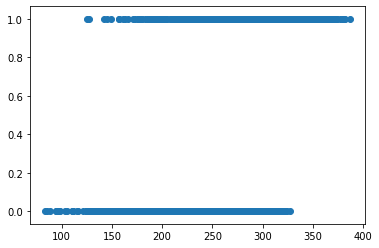

In [ ]:
plt.scatter(df['Mean'], df['Classnum'])

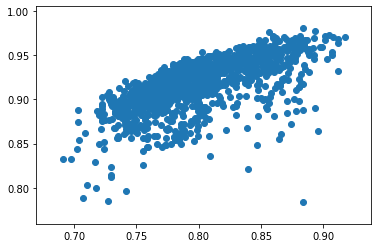

In [ ]:
plt.scatter(df['Homogenity'], df['Correlation'])

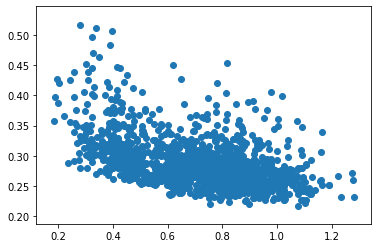

In [ ]:
plt.scatter(df['Contrast'], df['Energy'])

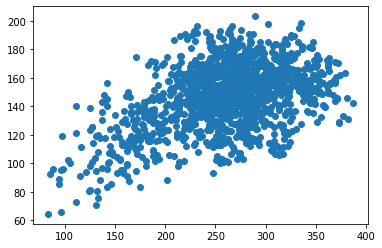

In [ ]:
plt.scatter(df['Mean'], df['Std'])

(array([0.01026022, 0.01539032, 0.02565054, 0.05643118, 0.13851291,
        0.19494409, 0.38219302, 0.6720441 , 0.95163497, 1.0055011 ]),
 array([10.36922173, 10.65886168, 10.94850162, 11.23814157, 11.52778151,
        11.81742146, 12.1070614 , 12.39670135, 12.68634129, 12.97598124,
        13.26562118]),
 <a list of 10 Patch objects>)

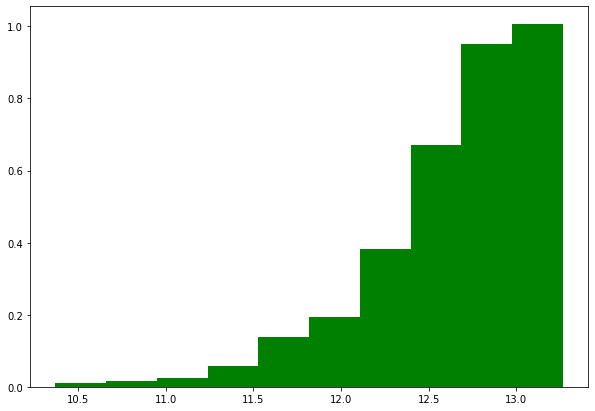

In [ ]:
plt.figure(figsize=(10,7))
plt.hist(df['Entropy'], color='g', density=1)

# SVM

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate

In [ ]:
# split the full data 80:20 into training:validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=101)

# split training data 87.5:12.5 into training:testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.875, random_state=101)



In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=20)
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=20, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# make predictions on validation set
y_pred = svclassifier.predict(X_valid)

In [ ]:
# predictions on testing data set
test_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_valid,y_pred))
print(classification_report(y_valid,y_pred))

[[117   0]
 [ 11 142]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.96       117
           1       1.00      0.93      0.96       153

    accuracy                           0.96       270
   macro avg       0.96      0.96      0.96       270
weighted avg       0.96      0.96      0.96       270



In [ ]:
print(accuracy_score(y_valid,y_pred)*100)

95.92592592592592


In [ ]:
print(accuracy_score(y_test, test_pred)*100)

95.55555555555556


## Checking the single image details

In [ ]:
df.iloc[0]

Unnamed: 0     989.000000
Mean           241.521713
Std            130.952415
Entropy         12.747182
Contrast         0.791373
Energy           0.281060
Homogenity       0.778350
Correlation      0.875081
Classnum         1.000000
Name: 989, dtype: float64

In [ ]:
value_x = X.iloc[0]
value_x

Unnamed: 0     989.000000
Mean           241.521713
Std            130.952415
Entropy         12.747182
Contrast         0.791373
Energy           0.281060
Homogenity       0.778350
Correlation      0.875081
Name: 989, dtype: float64

In [ ]:
value_y = [y.iloc[0]]
value_y

[1]

In [ ]:
new_pred = svclassifier.predict([value_x])
new_pred

array([1], dtype=int64)

In [ ]:
print("The original result:- ")
if(value_y == [0]):
    print("The image is diabetic")
else:
    print("The image is non diabetic")

The original result:- 
The image is non diabetic


In [ ]:
print("The model Prediction:- ")
if(new_pred == 0):
    print("The image is diabetic")
else:
    print("The image is non diabetic")
print("Accuracy Score :", accuracy_score(value_y, new_pred)*100)

The model Prediction:- 
The image is non diabetic
Accuracy Score : 100.0


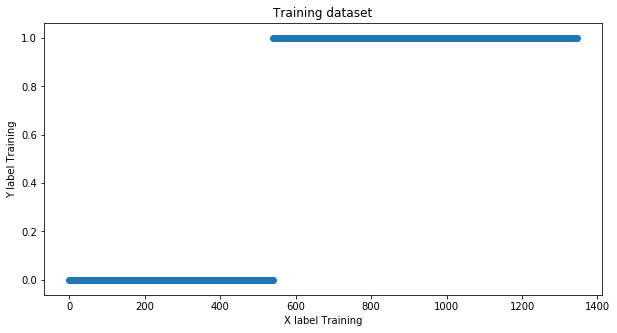

In [ ]:
plt.figure(figsize=(10,5))

plt.title('Training dataset')
plt.xlabel('X label Training')
plt.ylabel('Y label Training')
plt.scatter(X_train.iloc[:,0], y_train)

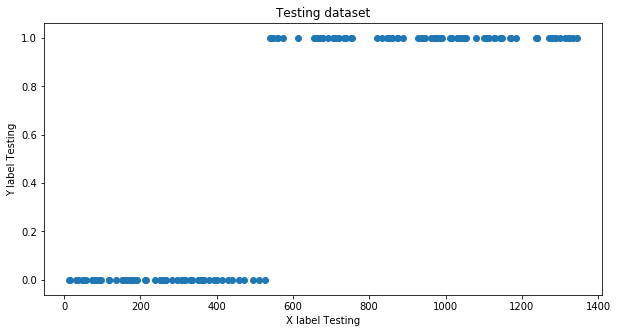

In [ ]:
plt.figure(figsize=(10,5))

plt.title('Testing dataset')
plt.xlabel('X label Testing')
plt.ylabel('Y label Testing')
plt.scatter(X_test.iloc[:,0], y_test)

In [ ]:
# Visualization Part

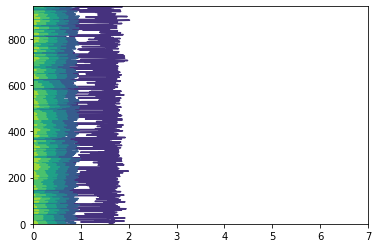

In [ ]:
plt.contour(X_train)

In [ ]:
import seaborn as sns

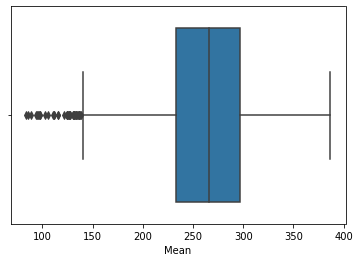

In [ ]:
sns.boxplot(df['Mean'])

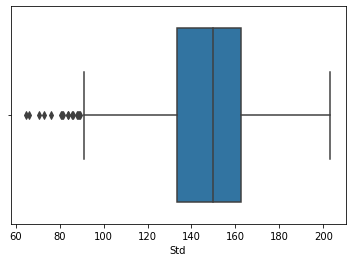

In [ ]:
sns.boxplot(df['Std'])

In [ ]:
df.head()

,Unnamed: 0,Mean,Std,Entropy,Contrast,Energy,Homogenity,Correlation,Classnum
989,989,241.521713,130.952415,12.747182,0.791373,0.281060,0.778350,0.875081,1
924,924,313.336173,138.852795,13.102142,0.710294,0.308893,0.810376,0.895497,1
523,523,282.477621,119.178941,13.252041,0.629706,0.244392,0.771818,0.903286,0
420,420,214.861056,156.398762,12.855548,0.420490,0.284064,0.851357,0.958162,0
388,388,218.604613,124.302346,13.122028,0.620980,0.264797,0.798917,0.908999,0


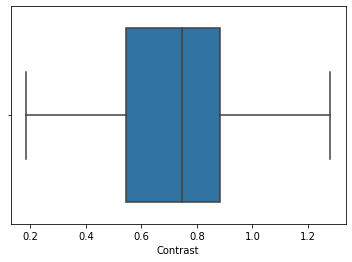

In [ ]:
sns.boxplot(df['Contrast'])

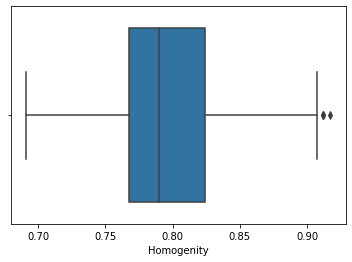

In [ ]:
sns.boxplot(df['Homogenity'])

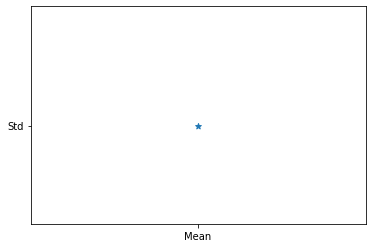

In [ ]:
plt.scatter('Mean', 'Std', marker='*')